<a href="https://colab.research.google.com/github/maacunap76/Especiaizacion_ML_Deep_DMC/blob/main/Supervised_models/Logistic_regression/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Automobile Loan Default Dataset
</font></h1>

---

## Objetivo de este Notebook

1. Como construir e interpretar un modelo de regresión logística.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
6. <a href="#item34">Entrenamiento del modelo</a>  

</font>
</div>

## 1. Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.



<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no. 




<img src="https://storage.googleapis.com/kaggle-datasets-images/1205706/2014650/7a50061003ce0de9839d54ff4673ccf2/dataset-cover.jpg?t=2021-07-04-09-18-01" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cómo identificaremos a los clientes morosos? </div>


<b>Descripción de datos</b>

El data frame de Automovile Loan tiene 121,856 filas y 40 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables. La columna <b>"Default"</b> es la variable a predecir. Es igual a uno para clientes que cayeron en mora y 0 para clientes que no.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente moroso.


---


<strong>Puede consultar este [link](https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


In [455]:
import pandas as pd
import seaborn as  sns
import numpy as np

In [456]:
pddf = pd.read_csv('/Train_Dataset.csv')
pddf.head()

<ipython-input-456-c4be0d628733>:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  pddf = pd.read_csv('/Train_Dataset.csv')


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [457]:
pddf.replace({'@': None,
              '#': None,
              '##': None,
              '&': None,
              'x': None,
              '$': None,
              'XNA' : None,
              '#VALUE!': None}, inplace = True)

In [458]:
categorical_features = ['Accompany_Client', 'Client_Income_Type', 
                        'Client_Education', 'Client_Marital_Status', 
                        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
                        'Client_Occupation', 'Client_Permanent_Match_Tag', 
                        'Client_Contact_Work_Tag', 'Type_Organization',
                        'Car_Owned',
                        'Bike_Owned',
                        'Active_Loan',
                        'House_Own',
                        'Mobile_Tag',
                        'Homephone_Tag','Workphone_Working']

numerical_features = list(set(pddf.columns.tolist()) - set(categorical_features +['ID_DaYs','ID','Default']))

In [459]:
# convert Series
for col in numerical_features:
  pddf[col] = pd.to_numeric(pddf[col])

In [460]:
pddf[categorical_features] = pddf[categorical_features].replace(1.0, '1')
pddf[categorical_features] = pddf[categorical_features].replace(0.0, '0')

In [461]:
pddf['Car_Owned'].drop_duplicates()

0       0
1       1
12    NaN
Name: Car_Owned, dtype: object

In [462]:
# convert Series
pddf[categorical_features] = pddf[categorical_features].astype('object')

In [463]:
pddf.dtypes

ID                              int64
Client_Income                 float64
Car_Owned                      object
Bike_Owned                     object
Active_Loan                    object
House_Own                      object
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Own_House_Age                 float64
Mobile_Tag                     object
Homephone_Tag                  object
Workphone_Working              object
Client_Occupation              object
Client_Famil

<Axes: xlabel='Default', ylabel='count'>

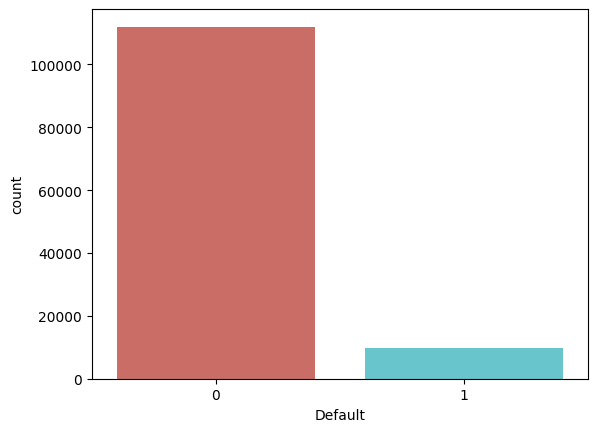

In [464]:
sns.countplot(x='Default', data = pddf, palette = 'hls')

In [465]:
pddf.Default.mean()

0.0807920824579832

In [466]:
pddf.groupby('House_Own').agg({'Default': 'mean'})

,Default
House_Own,
0,0.081051
1,0.080454


In [467]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf, 
                               stratify = pddf['Default'],#se estratifica
                               train_size = 0.7, 
                               random_state = 123)

In [468]:
#Analisis Univariado

In [469]:
univariate = pddf[numerical_features].describe(percentiles = [0.05,0.95]).transpose()
univariate.reset_index(drop =False, inplace= True)
univariate['missing_rate'] = 1 - univariate['count']/len(train)
univariate.rename(columns = {'index' : 'feature','5%':'p5','50%':'median','95%':'p95'}, inplace = True)
univariate

,feature,count,mean,std,min,p5,median,p95,max,missing_rate
0,Application_Process_Hour,118193.0,12.063100,3.280695,0.000000,7.000000,12.000000,17.000000,2.300000e+01,-0.385632
1,Registration_Days,118225.0,4975.162123,3514.546963,0.000000,332.000000,4493.000000,11383.800000,2.373800e+04,-0.386007
2,Credit_Bureau,103316.0,1.891082,1.861921,0.000000,0.000000,1.000000,6.000000,2.200000e+01,-0.211222
3,Client_Family_Members,119446.0,2.154329,0.912686,1.000000,1.000000,2.000000,4.000000,1.600000e+01,-0.400321
4,Score_Source_1,53021.0,0.501213,0.211204,0.014568,0.157872,0.504657,0.831375,9.457413e-01,0.378410
5,Age_Days,118239.0,16027.422948,4366.356504,7676.000000,9406.000000,15734.000000,23209.000000,2.520100e+04,-0.386171
6,Client_Income,118234.0,16865.191737,11538.154494,2565.000000,6750.000000,14400.000000,33750.000000,1.800009e+06,-0.386112
7,Employed_Days,118190.0,67154.070615,138971.782951,0.000000,229.000000,2212.000000,365243.000000,3.652430e+05,-0.385597
8,Social_Circle_Default,59928.0,0.117428,0.107974,0.000000,0.008200,0.088700,0.325800,1.000000e+00,0.297436
9,Cleint_City_Rating,119447.0,2.030038,0.504407,1.000000,1.000000,2.000000,3.000000,3.000000e+00,-0.400333


In [470]:
# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
  desc = univariate.loc[univariate.feature == col]

  lower_limit = desc.p5.values[0]
  upper_limit = desc.p95.values[0]

  train[col + '_tric'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)

In [471]:
train

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Day_tric,Score_Source_3_tric,Child_Count_tric,Score_Source_2_tric,ID_Days_tric,Own_House_Age_tric,Phone_Change_tric,Credit_Amount_tric,Loan_Annuity_tric,Population_Region_Relative_tric
66289,12199917,14400.0,0,1,1,1,0.0,180000.00,6269.85,Alone,...,1.0,0.324891,0.0,0.673780,4914.0,NaN,2193.0,135000.00,5345.55,0.028663
109009,12104744,6750.0,0,1,1,0,1.0,15282.00,1524.15,Relative,...,5.0,NaN,1.0,0.638836,368.0,NaN,1966.0,15282.00,1524.15,0.030755
30526,12149301,NaN,0,1,0,1,1.0,49752.00,3930.75,Alone,...,4.0,0.286652,1.0,0.679607,3653.0,NaN,2522.0,49752.00,3930.75,0.035792
117872,12131116,11250.0,1,0,1,1,0.0,112500.00,3302.55,Alone,...,4.0,0.344155,0.0,0.475857,862.0,13.0,576.0,112500.00,3302.55,0.014520
90866,12210770,10800.0,0,0,1,0,0.0,122790.15,5215.50,Alone,...,0.0,0.239226,0.0,0.434370,4386.0,NaN,491.0,122790.15,5215.50,0.008866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,12186869,7200.0,0,0,NaN,1,3.0,67500.00,2424.60,Alone,...,2.0,0.382502,2.0,0.658005,4092.0,NaN,2373.0,67500.00,2424.60,0.019101
9256,12195496,27000.0,1,0,1,1,2.0,16681.05,1809.45,Alone,...,1.0,NaN,2.0,0.550702,368.0,9.0,285.0,16681.05,1809.45,0.014464
8612,12186343,NaN,0,0,0,1,0.0,78192.00,3457.35,Kids,...,5.0,0.413597,0.0,0.699608,4808.0,NaN,1088.0,78192.00,3457.35,0.030755
4291,12100317,9000.0,0,0,0,1,0.0,120120.75,3181.50,Alone,...,2.0,NaN,0.0,0.717743,4779.0,NaN,738.0,120120.75,3181.50,0.009657


<Axes: >

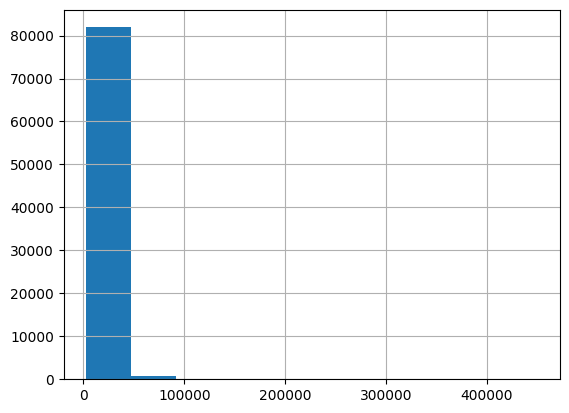

In [472]:
train.Client_Income.hist()

<Axes: >

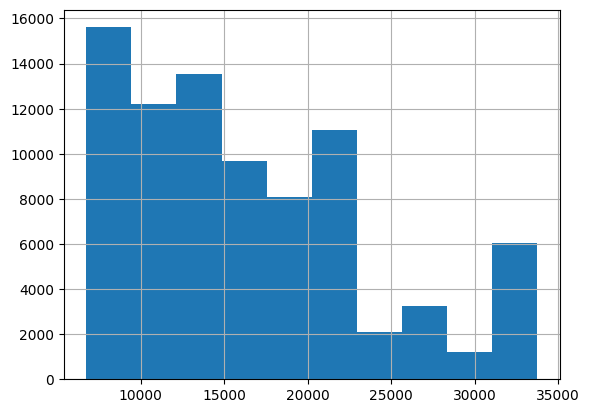

In [473]:
train.Client_Income_tric.hist()

In [474]:
# Discretizar variables, esto es para variables numericas
from sklearn.preprocessing import KBinsDiscretizer

temp = train.copy()
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins = 10, 
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp['Client_Income_tric']).reshape(-1, 1))

<ipython-input-474-5c4e3c868cad>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


In [475]:
discretizer.transform(np.array(temp['Client_Income_tric']).reshape(-1, 1))

array([[2.],
       [0.],
       [3.],
       ...,
       [3.],
       [0.],
       [0.]])

In [476]:
temp['Client_Income_rango'] = discretizer.transform(np.array(temp['Client_Income_tric']).reshape(-1, 1))


In [477]:
temp

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Score_Source_3_tric,Child_Count_tric,Score_Source_2_tric,ID_Days_tric,Own_House_Age_tric,Phone_Change_tric,Credit_Amount_tric,Loan_Annuity_tric,Population_Region_Relative_tric,Client_Income_rango
66289,12199917,14400.000000,0,1,1,1,0.0,180000.00,6269.85,Alone,...,0.324891,0.0,0.673780,4914.0,10.994885,2193.0,135000.00,5345.55,0.028663,2.0
109009,12104744,6750.000000,0,1,1,0,1.0,15282.00,1524.15,Relative,...,0.512319,1.0,0.638836,368.0,10.994885,1966.0,15282.00,1524.15,0.030755,0.0
30526,12149301,16853.821827,0,1,0,1,1.0,49752.00,3930.75,Alone,...,0.286652,1.0,0.679607,3653.0,10.994885,2522.0,49752.00,3930.75,0.035792,3.0
117872,12131116,11250.000000,1,0,1,1,0.0,112500.00,3302.55,Alone,...,0.344155,0.0,0.475857,862.0,13.000000,576.0,112500.00,3302.55,0.014520,1.0
90866,12210770,10800.000000,0,0,1,0,0.0,122790.15,5215.50,Alone,...,0.239226,0.0,0.434370,4386.0,10.994885,491.0,122790.15,5215.50,0.008866,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,12186869,7200.000000,0,0,NaN,1,3.0,67500.00,2424.60,Alone,...,0.382502,2.0,0.658005,4092.0,10.994885,2373.0,67500.00,2424.60,0.019101,0.0
9256,12195496,27000.000000,1,0,1,1,2.0,16681.05,1809.45,Alone,...,0.512319,2.0,0.550702,368.0,9.000000,285.0,16681.05,1809.45,0.014464,7.0
8612,12186343,16853.821827,0,0,0,1,0.0,78192.00,3457.35,Kids,...,0.413597,0.0,0.699608,4808.0,10.994885,1088.0,78192.00,3457.35,0.030755,3.0
4291,12100317,9000.000000,0,0,0,1,0.0,120120.75,3181.50,Alone,...,0.512319,0.0,0.717743,4779.0,10.994885,738.0,120120.75,3181.50,0.009657,0.0


In [478]:
temp.groupby('Client_Income_rango').agg({'Default': 'mean'}).reset_index()

,Client_Income_rango,Default
0,0.0,0.081807
1,1.0,0.086715
2,2.0,0.087662
3,3.0,0.084322
4,4.0,0.082114
5,5.0,0.078142
6,6.0,0.069065
7,7.0,0.064387
8,8.0,0.068909
9,9.0,0.061857


<Axes: xlabel='Client_Income_rango', ylabel='Default'>

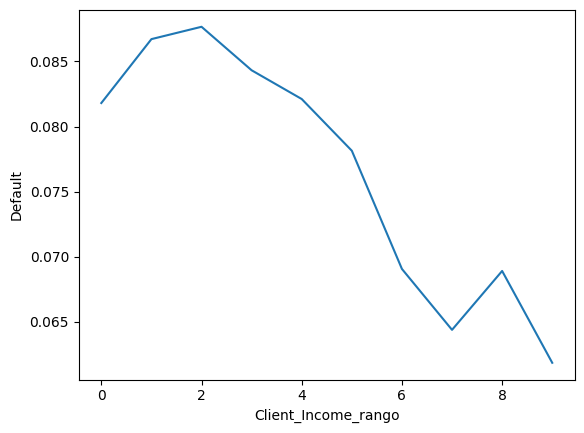

In [479]:
#interpretacion del ratio de evento por tramo de variable numerica
sns.lineplot(data = temp.groupby('Client_Income_rango').agg({'Default': 'mean'}).reset_index(),
             x = 'Client_Income_rango',
             y = 'Default')

In [480]:
train['Car_Owned'].drop_duplicates()

66289       0
117872      1
40786     NaN
Name: Car_Owned, dtype: object

In [481]:
#tratamiento de missings
train = train.fillna(train.median())
test  = test.fillna(train.median())

<ipython-input-481-be7eb047d8eb>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.median())
<ipython-input-481-be7eb047d8eb>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test  = test.fillna(train.median())


In [482]:
train[categorical_features] = train[categorical_features].replace(1.0, '1')
train[categorical_features] = train[categorical_features].replace(0.0, '0')
test[categorical_features] = test[categorical_features].replace(1.0, '1')
test[categorical_features] = test[categorical_features].replace(0.0, '0')

In [483]:
train['Car_Owned'].drop_duplicates()

66289     0
117872    1
Name: Car_Owned, dtype: object

In [484]:
#Preseleccion de Variables

In [485]:
from sklearn.metrics import roc_auc_score

dfgini = pd.DataFrame({'feature': numerical_features,
                       'gini': [roc_auc_score(train.Default, train[col])*2-1 for col in numerical_features]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)

,feature,gini,gini_abs
13,Score_Source_2,-0.295250,0.295250
11,Score_Source_3,-0.281581,0.281581
7,Employed_Days,-0.181642,0.181642
5,Age_Days,-0.153077,0.153077
4,Score_Source_1,-0.152179,0.152179
14,ID_Days,-0.118824,0.118824
16,Phone_Change,-0.114764,0.114764
9,Cleint_City_Rating,0.092428,0.092428
1,Registration_Days,-0.074154,0.074154
19,Population_Region_Relative,-0.064022,0.064022


In [486]:
train['Accompany_Client'].drop_duplicates()

66289        Alone
109009    Relative
52595         Kids
53550      Partner
72805          NaN
113076      Others
58543        Group
32663         None
Name: Accompany_Client, dtype: object

In [487]:
#Tratamiento de variables categoricas

In [488]:
#tratamiento de missings

In [489]:
train['Car_Owned'].drop_duplicates()

66289     0
117872    1
Name: Car_Owned, dtype: object

In [490]:
train[categorical_features] = train[categorical_features].replace(np.nan,'missing')
test[categorical_features] = test[categorical_features].replace(np.nan,'missing')

In [491]:
train['Accompany_Client'].drop_duplicates()

66289        Alone
109009    Relative
52595         Kids
53550      Partner
72805      missing
113076      Others
58543        Group
Name: Accompany_Client, dtype: object

In [492]:
train['Car_Owned'].drop_duplicates()

66289     0
117872    1
Name: Car_Owned, dtype: object

In [493]:
train[categorical_features].dtypes

Accompany_Client              object
Client_Income_Type            object
Client_Education              object
Client_Marital_Status         object
Client_Gender                 object
Loan_Contract_Type            object
Client_Housing_Type           object
Client_Occupation             object
Client_Permanent_Match_Tag    object
Client_Contact_Work_Tag       object
Type_Organization             object
Car_Owned                     object
Bike_Owned                    object
Active_Loan                   object
House_Own                     object
Mobile_Tag                    object
Homephone_Tag                 object
Workphone_Working             object
dtype: object

In [494]:
train[categorical_features].drop_duplicates()

,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Car_Owned,Bike_Owned,Active_Loan,House_Own,Mobile_Tag,Homephone_Tag,Workphone_Working
66289,Alone,Commercial,Secondary,M,Male,CL,Home,missing,Yes,No,missing,0,1,1,1,1,0,0
109009,Relative,Commercial,Secondary,M,Male,CL,Home,Laborers,Yes,Yes,Business Entity Type 2,0,1,1,0,1,0,0
30526,Alone,Service,Graduation,M,Male,CL,Home,missing,Yes,Yes,Self-employed,0,1,0,1,1,0,1
117872,Alone,Service,Secondary,M,Male,CL,Home,Core,Yes,Yes,Self-employed,1,0,1,1,1,0,0
90866,Alone,Service,Secondary,M,Male,CL,missing,Sales,No,Yes,Trade: type 3,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105952,Alone,Service,missing,M,missing,CL,Home,missing,Yes,Yes,Transport: type 2,1,0,1,0,1,1,1
66643,Alone,Commercial,Graduation,M,Male,CL,Home,Core,Yes,Yes,Transport: type 2,1,0,1,1,1,0,0
76223,Alone,Service,Secondary,M,Female,CL,Home,Laborers,Yes,No,Business Entity Type 1,1,0,0,0,1,0,1
98407,Alone,Service,missing,M,Female,RL,Home,Sales,Yes,Yes,Self-employed,0,1,0,1,1,0,0


In [495]:
train['Car_Owned'].drop_duplicates()

66289     0
117872    1
Name: Car_Owned, dtype: object

In [496]:
#one hot encoding

In [497]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(sparse_output = True)
#encoder.fit(train[categorical_features])

In [498]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = True, handle_unknown = 'infrequent_if_exist')#esta parte del infrequent es por sise encuentra una categoria nueva en otro set de datos que no sea el de train
encoder.fit(train[categorical_features])

OneHotEncoder(handle_unknown='infrequent_if_exist')

In [ ]:
train[encoder.get_feature_names_out(categorical_features)] = encoder.transform(train[categorical_features]).toarray()
test[encoder.get_feature_names_out(categorical_features)] = encoder.transform(test[categorical_features]).toarray()

In [500]:
train.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Active_Loan_0,Active_Loan_1,House_Own_0,House_Own_1,Mobile_Tag_0,Mobile_Tag_1,Homephone_Tag_0,Homephone_Tag_1,Workphone_Working_0,Workphone_Working_1
66289,12199917,14400.0,0,1,1,1,0.0,180000.00,6269.85,Alone,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
109009,12104744,6750.0,0,1,1,0,1.0,15282.00,1524.15,Relative,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30526,12149301,14760.0,0,1,0,1,1.0,49752.00,3930.75,Alone,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
117872,12131116,11250.0,1,0,1,1,0.0,112500.00,3302.55,Alone,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
90866,12210770,10800.0,0,0,1,0,0.0,122790.15,5215.50,Alone,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [501]:
#target encoding

In [ ]:
!pip install category_encoders

In [503]:

from category_encoders import TargetEncoder

encoder = TargetEncoder(handle_unknown = 'infrequent_if_exist')
encoder.fit(train[categorical_features].astype('category'), train['Default'])

TargetEncoder(cols=['Accompany_Client', 'Client_Income_Type',
                    'Client_Education', 'Client_Marital_Status',
                    'Client_Gender', 'Loan_Contract_Type',
                    'Client_Housing_Type', 'Client_Occupation',
                    'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
                    'Type_Organization', 'Car_Owned', 'Bike_Owned',
                    'Active_Loan', 'House_Own', 'Mobile_Tag', 'Homephone_Tag',
                    'Workphone_Working'],
              handle_unknown='infrequent_if_exist')

In [504]:

train[[x + '_coded' for x in categorical_features]] = encoder.transform(train[categorical_features].astype('category'))
test[[x + '_coded' for x in categorical_features]] = encoder.transform(test[categorical_features].astype('category'))

In [505]:

train[['Client_Gender', 'Client_Gender_coded']].head(10)

,Client_Gender,Client_Gender_coded
66289,Male,0.070758
109009,Male,0.070758
30526,Male,0.070758
117872,Male,0.070758
90866,Male,0.070758
40786,Male,0.070758
13964,Male,0.070758
7076,Female,0.100146
17169,Male,0.070758
64245,Male,0.070758


In [505]:
#Analisis Univariado

In [506]:
categorical_features_coded = [x + '_coded' for x in categorical_features]

In [507]:
univariate = train[numerical_features + categorical_features_coded].describe(percentiles = [0.05, 0.95]).transpose()
univariate.reset_index(drop = False, inplace = True)

univariate['missing_rate'] = 1 - univariate['count']/len(train)

univariate.rename(columns = {'index' : 'feature',
                             '5%': 'p5',
                             '50%' : 'median',
                             '95%': 'p95'}, inplace = True)
univariate.head()
     

,feature,count,mean,std,min,p5,median,p95,max,missing_rate
0,Application_Process_Hour,85299.0,12.059790,3.232006,0.000000,7.000000,12.00000,17.000000,23.000000,0.0
1,Registration_Days,85299.0,4966.399419,3465.480919,0.000000,342.000000,4496.00000,11302.000000,23738.000000,0.0
2,Credit_Bureau,85299.0,1.756738,1.744462,0.000000,0.000000,1.00000,5.000000,22.000000,0.0
3,Client_Family_Members,85299.0,2.149099,0.901187,1.000000,1.000000,2.00000,4.000000,16.000000,0.0
4,Score_Source_1,85299.0,0.502019,0.139352,0.014568,0.222943,0.50333,0.772109,0.945741,0.0


In [508]:
# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
  desc = univariate.loc[univariate.feature == col]

  lower_limit = desc.p5.values[0]
  upper_limit = desc.p95.values[0]

  train[col + '_t'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
  
  test[col + '_t'] = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                               upper_limit if x >= upper_limit else
                                               x)
     

In [509]:

univariate.head()

,feature,count,mean,std,min,p5,median,p95,max,missing_rate
0,Application_Process_Hour,85299.0,12.059790,3.232006,0.000000,7.000000,12.00000,17.000000,23.000000,0.0
1,Registration_Days,85299.0,4966.399419,3465.480919,0.000000,342.000000,4496.00000,11302.000000,23738.000000,0.0
2,Credit_Bureau,85299.0,1.756738,1.744462,0.000000,0.000000,1.00000,5.000000,22.000000,0.0
3,Client_Family_Members,85299.0,2.149099,0.901187,1.000000,1.000000,2.00000,4.000000,16.000000,0.0
4,Score_Source_1,85299.0,0.502019,0.139352,0.014568,0.222943,0.50333,0.772109,0.945741,0.0


<ipython-input-510-f01624099e57>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())
<ipython-input-510-f01624099e57>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))


<Axes: xlabel='Age_Days_t_rango', ylabel='Default'>

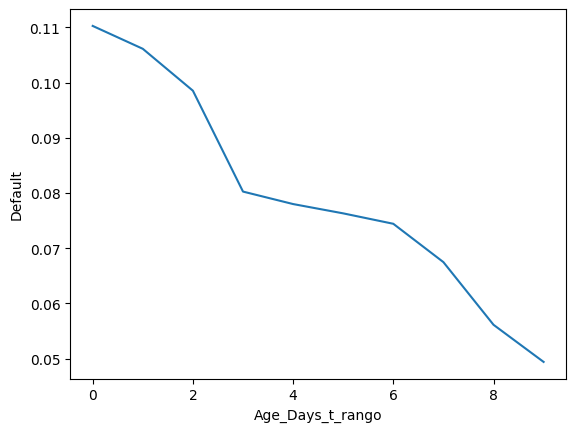

In [510]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'Age_Days_t'
temp = train.copy()
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins = 10, 
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'Default': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'Default')


In [511]:
#tratamiento de missings
train = train.fillna(train.median())
test  = test.fillna(train.median())

<ipython-input-511-be7eb047d8eb>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.median())
<ipython-input-511-be7eb047d8eb>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test  = test.fillna(train.median())


Pre-selección de variables

In [512]:
from sklearn.metrics import roc_auc_score

dfgini = pd.DataFrame({'feature': numerical_features + categorical_features_coded,
                       'gini': [roc_auc_score(train.Default, train[col])*2-1 for col in numerical_features + categorical_features_coded]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)

,feature,gini,gini_abs
13,Score_Source_2,-0.295250,0.295250
11,Score_Source_3,-0.281581,0.281581
7,Employed_Days,-0.181642,0.181642
5,Age_Days,-0.153077,0.153077
27,Client_Occupation_coded,0.152761,0.152761
4,Score_Source_1,-0.152179,0.152179
30,Type_Organization_coded,0.151666,0.151666
14,ID_Days,-0.118824,0.118824
16,Phone_Change,-0.114764,0.114764
21,Client_Income_Type_coded,0.111633,0.111633


In [513]:
univariate_II = pd.merge(univariate, dfgini, on = 'feature', how = 'left')
univariate_II.sort_values(by = 'gini_abs', ascending = False)

,feature,count,mean,std,min,p5,median,p95,max,missing_rate,gini,gini_abs
13,Score_Source_2,85299.0,0.520921,0.706605,0.000005,0.135967,0.565440,0.746536,100.000000,0.0,-0.295250,0.295250
11,Score_Source_3,85299.0,0.516834,0.171975,0.000527,0.177704,0.537070,0.773896,0.896010,0.0,-0.281581,0.281581
7,Employed_Days,85299.0,65227.672399,137338.137712,0.000000,231.000000,2211.000000,365243.000000,365243.000000,0.0,-0.181642,0.181642
5,Age_Days,85299.0,16021.678062,4303.407384,7676.000000,9456.900000,15736.000000,23175.000000,25201.000000,0.0,-0.153077,0.153077
27,Client_Occupation_coded,85299.0,0.080786,0.021578,0.049457,0.054551,0.066931,0.110208,0.178506,0.0,0.152761,0.152761
4,Score_Source_1,85299.0,0.502019,0.139352,0.014568,0.222943,0.503330,0.772109,0.945741,0.0,-0.152179,0.152179
30,Type_Organization_coded,85299.0,0.080773,0.020209,0.013986,0.055296,0.082820,0.107623,0.152542,0.0,0.151666,0.151666
14,ID_Days,85299.0,2999.751685,1476.165989,0.000000,382.000000,3247.000000,4924.000000,7197.000000,0.0,-0.118824,0.118824
16,Phone_Change,85299.0,956.956905,815.736703,0.000000,0.000000,756.000000,2505.000000,4185.000000,0.0,-0.114764,0.114764
21,Client_Income_Type_coded,85299.0,0.080776,0.015878,0.054581,0.054581,0.094234,0.094234,0.151207,0.0,0.111633,0.111633


In [514]:
# Aca podemos definir los criterios para seleccionar variables

print('initial features: ' + str(len(univariate_II)))
print('selected features: ' + str(len(univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)])))
final_features = univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)].feature.tolist()

initial features: 38
selected features: 16


In [ ]:
#Estandarización


In [515]:
train[[x + '_std' for x in final_features]] = (train[final_features] - train[final_features].mean())/train[final_features].std()
test[[x + '_std' for x in final_features]] = (test[final_features] - train[final_features].mean())/train[final_features].std()

In [ ]:
#Regresion Logistica

In [516]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(train.Default, sm.add_constant(train[[x + '_std' for x in final_features]]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.254897
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                85299
Model:                          Logit   Df Residuals:                    85282
Method:                           MLE   Df Model:                           16
Date:                Sat, 27 May 2023   Pseudo R-squ.:                 0.09188
Time:                        03:10:18   Log-Likelihood:                -21742.
converged:                       True   LL-Null:                       -23942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.7291      0.016   -170.676    

In [517]:

features = [x + '_std' for x in final_features]
features.remove('Population_Region_Relative_std')

mod = sm.Logit(train.Default, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.254900
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                85299
Model:                          Logit   Df Residuals:                    85283
Method:                           MLE   Df Model:                           15
Date:                Sat, 27 May 2023   Pseudo R-squ.:                 0.09187
Time:                        03:10:50   Log-Likelihood:                -21743.
converged:                       True   LL-Null:                       -23942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.7275      0.016   -174.007      0.000

In [518]:

features = [x + '_std' for x in final_features]
features.remove('Population_Region_Relative_std')

mod = sm.Logit(train.Default, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.254900
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                85299
Model:                          Logit   Df Residuals:                    85283
Method:                           MLE   Df Model:                           15
Date:                Sat, 27 May 2023   Pseudo R-squ.:                 0.09187
Time:                        03:12:19   Log-Likelihood:                -21743.
converged:                       True   LL-Null:                       -23942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.7275      0.016   -174.007      0.000

In [519]:
features.remove('Client_Income_Type_coded_std')
mod = sm.Logit(train.Default, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.254920
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                85299
Model:                          Logit   Df Residuals:                    85284
Method:                           MLE   Df Model:                           14
Date:                Sat, 27 May 2023   Pseudo R-squ.:                 0.09180
Time:                        03:12:35   Log-Likelihood:                -21744.
converged:                       True   LL-Null:                       -23942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.7270      0.016   -174.064      0.000   

In [520]:
features.remove('Employed_Days_std')
mod = sm.Logit(train.Default, sm.add_constant(train[features]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.254938
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                85299
Model:                          Logit   Df Residuals:                    85285
Method:                           MLE   Df Model:                           13
Date:                Sat, 27 May 2023   Pseudo R-squ.:                 0.09173
Time:                        03:12:48   Log-Likelihood:                -21746.
converged:                       True   LL-Null:                       -23942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.7271      0.016   -174.037      0.000   